In [1]:
import numpy as np
from scipy.stats.stats import pearsonr

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import math

import pandas as pd

%matplotlib inline
pd.set_option('precision',2)
plt.style.use('seaborn')

In [2]:
#array creation
x = np.array([1,6,2]) #向量
y = np.array([1,4,3]) #向量
len(x), len(y)

(3, 3)

In [3]:
#array operations
x + y

array([ 2, 10,  5])

In [4]:
#matrix creation
x = np.asmatrix(np.arange(1,5).reshape(2,2).transpose()) #建立矩阵
x

matrix([[1, 3],
        [2, 4]])

In [5]:
# matrix creation
np.power(x,2)

matrix([[ 1,  9],
        [ 4, 16]])

In [6]:
#random normal distribution & correlation
x = np.random.normal(size = 50) #标准正态分布随机数
#y = x + np.random.normal（）

In [7]:
# random seed and basic statistical function
np.random.seed(3)
y = np.random.normal(size = 100) #创建随机正态分布的list
#print(y)
y.mean(),y.var(),np.sqrt(y.var()),y.std() #均值，方差，标准差，标准差

(-0.10863707440606224,
 1.132081888283007,
 1.0639933685333791,
 1.0639933685333791)

# Graphics

In [8]:
x = np.random.normal(size = 100)
y = np.random.normal(size = 100)

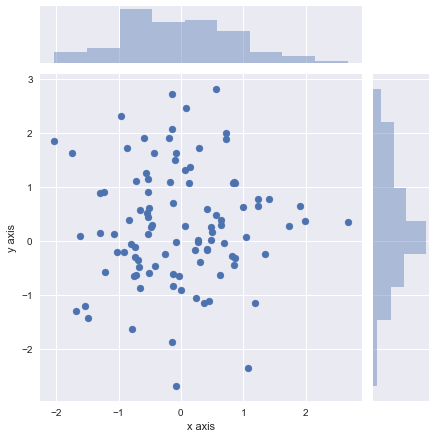

In [9]:
p = sns.jointplot(x,y,kind='scatter')
p.set_axis_labels(xlabel='x axis', ylabel='y axis')

In [10]:
#create a sequence of numbers
x = np.arange(1,11) #创建向量
x

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [11]:
#linearly spaced numbers
x = np.linspace(-np.pi, np.pi, num = 50) #创建向量，50个随机数，均值为0，上下限为3.14，

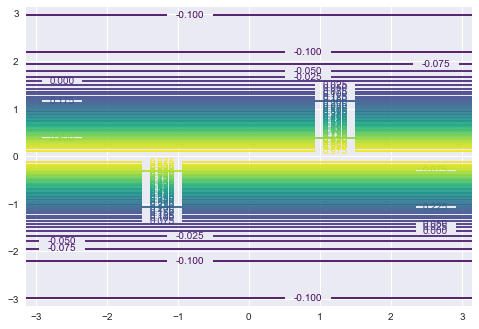

In [12]:
x = np.linspace(-np.pi, np.pi, num = 50) 
y = x

# simulating R outer function
def pf(a,b):
    return math.cos(b) / (1 + a**2)

f = np.empty((len(x),len(y)))

for i in range(len(x)):
    for j in range(len(y)):
        f[i,j] = pf(x[i],y[i])
        
# contour plot
cp = plt.contour(x,y,f,45,cmap = 'viridis')
plt.clabel(cp,inline = 1, fontsize = 10); #加上label

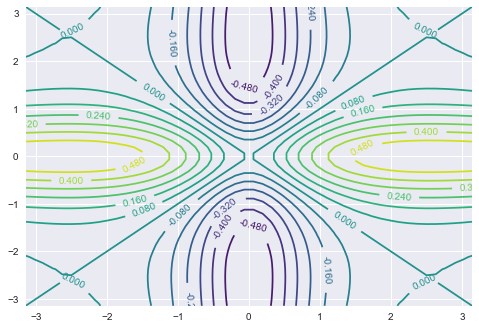

In [13]:
#contour 2
fa = (f-f.transpose())/2
cp = plt.contour(x,y,fa,15,cmap='viridis')
plt.clabel(cp,inline = 1, fontsize = 10); #加上label

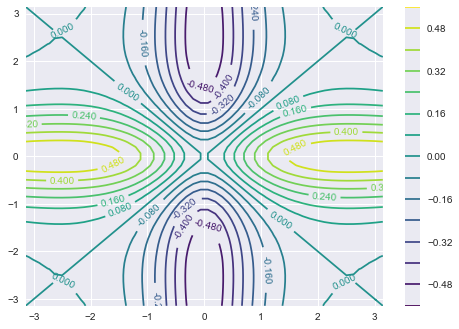

In [14]:
#heatmap
cp = plt.contour(x,y,fa,15,cmap = 'viridis') #画等高线图
plt.clabel(cp,inline = 1, fontsize = 10);
plt.colorbar();

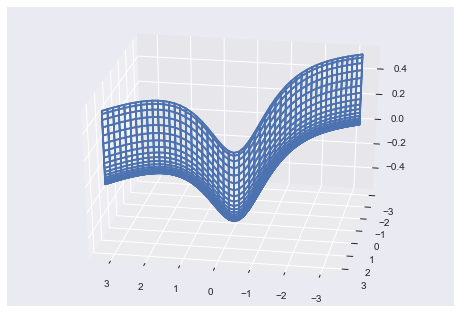

In [15]:
fig = plt.figure() #figure size 576*396 with 0 axes
ax = fig.add_subplot(111,projection='3d') #准备好3d坐标轴
ax.plot_wireframe(x,y,fa,cmap='viridis') #导入数据
ax.view_init(30,100)

2.3.3 Indexing Data

In [16]:
#matrix creation (R equivalent of matrix (1:16, 4, 4))
A = np.asmatrix(np.arange(1,17).reshape(4,4).transpose())
A

matrix([[ 1,  5,  9, 13],
        [ 2,  6, 10, 14],
        [ 3,  7, 11, 15],
        [ 4,  8, 12, 16]])

In [17]:
A[1,2]

10

In [18]:
# list selections needs explicit row repetition for multiple columns
A[[[0,0],[2,2]],[1,3]] #选择第2列和的4列

matrix([[ 5, 13],
        [ 7, 15]])

In [19]:
#select range of rows and columns
A[0:3,1:4]

matrix([[ 5,  9, 13],
        [ 6, 10, 14],
        [ 7, 11, 15]])

In [21]:
#select a range of rows and all columns
A[0:2,:]

matrix([[ 1,  5,  9, 13],
        [ 2,  6, 10, 14]])

In [23]:
#select all rows and a range of columns
A[:,0:2]

matrix([[1, 5],
        [2, 6],
        [3, 7],
        [4, 8]])

In [24]:
#shape of the matrix
A.shape

(4, 4)

# 2.3.4 Loading Data

In [29]:
# read csv data with pandas into dataframe, explicitly setting na_values.
# pandas read_xxx functions infer datatypes, headers, dates, etc. 
# without explicit declarations
Auto = pd.read_csv('/Users/appler/Desktop/Auto.csv', na_values=['?'])

In [30]:
Auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


In [31]:
Auto.shape

(397, 9)

In [32]:
# dropping rows (axis-0) where there are NA values (inplace)
Auto.dropna(axis=0, inplace=True)
Auto.shape

(392, 9)

In [34]:
#get column names of the dataframe
list(Auto.columns)

['mpg',
 'cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'year',
 'origin',
 'name']

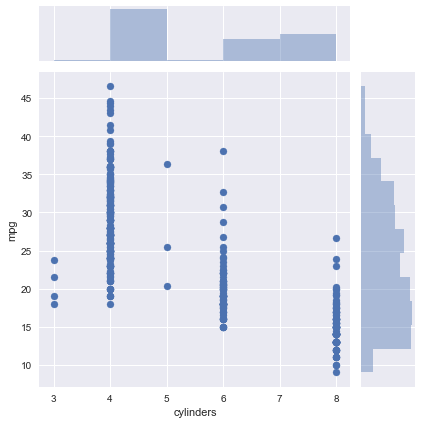

In [36]:
#seaborn scatterplot
pl=sns.jointplot(x='cylinders',y='mpg',data=Auto)

In [37]:
#change datatype of a column into a category #把数值型改成类别型
Auto['cylinders'] = Auto['cylinders'].astype('category') 

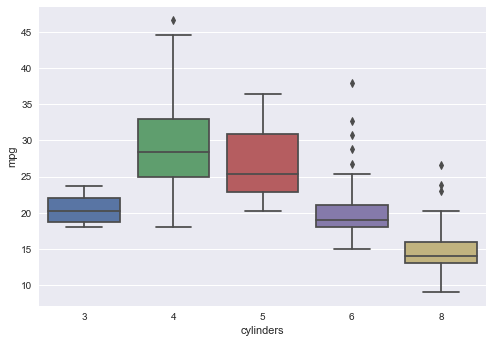

In [40]:
sns.boxplot(x='cylinders',y='mpg',data=Auto) #用箱线图来表示

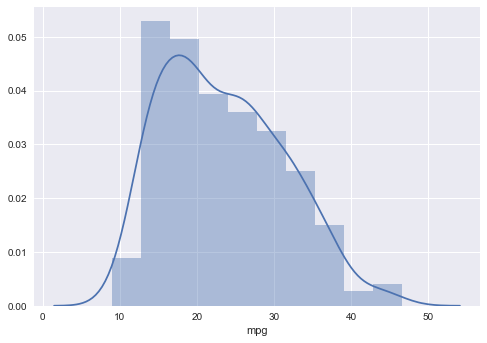

In [43]:
#Use density plot 概率密度分布图
sns.distplot(Auto['mpg'],bins=10)

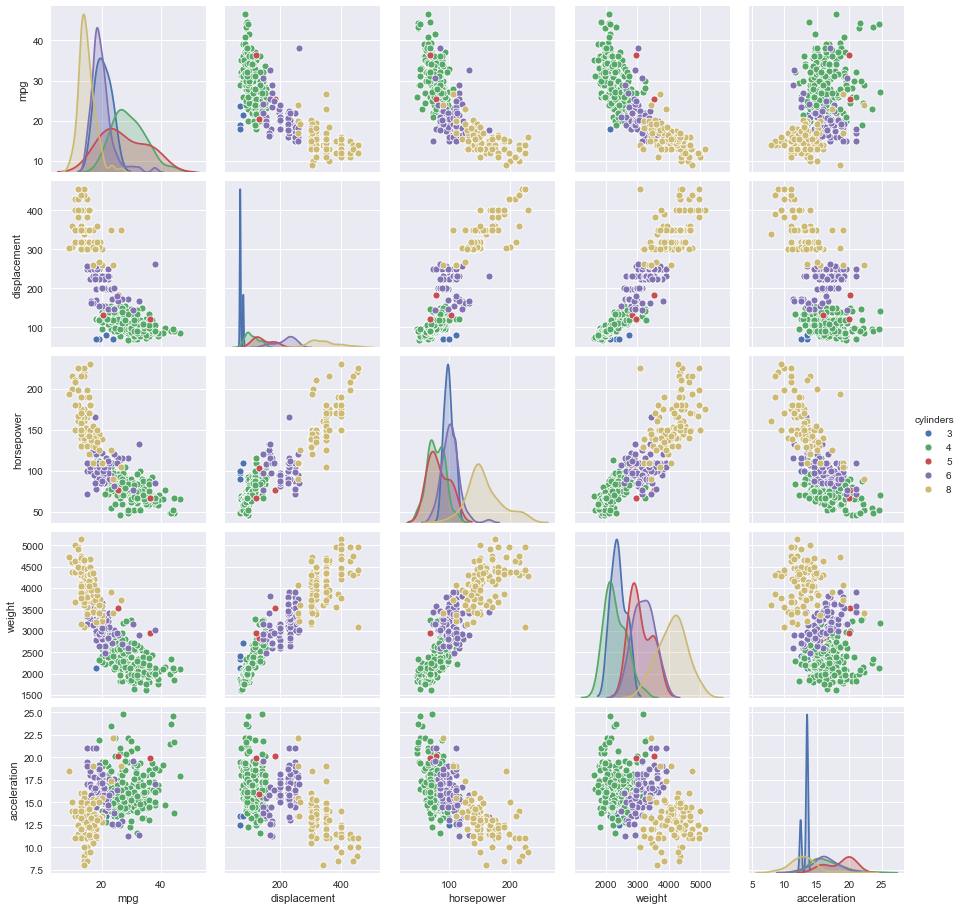

In [49]:
#seaborn pair plot for selected variables, paired by others #增加correlation plot, 而且是3D图。第三个轴是类别变量cylinder
sns.pairplot(Auto, vars=['mpg','displacement','horsepower','weight','acceleration'],hue='cylinders')

In [51]:
#summary statistics
Auto.describe(include='all')

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
count,392.00,392.0,392.00,392.00,392.00,392.00,392.00,392.00,392
unique,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,301
top,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,toyota corolla
freq,NaN,199.0,NaN,NaN,NaN,NaN,NaN,NaN,5
mean,23.45,NaN,194.41,104.47,2977.58,15.54,75.98,1.58,NaN
std,7.81,NaN,104.64,38.49,849.40,2.76,3.68,0.81,NaN
min,9.00,NaN,68.00,46.00,1613.00,8.00,70.00,1.00,NaN
25%,17.00,NaN,105.00,75.00,2225.25,13.78,73.00,1.00,NaN
50%,22.75,NaN,151.00,93.50,2803.50,15.50,76.00,1.00,NaN
75%,29.00,NaN,275.75,126.00,3614.75,17.02,79.00,2.00,NaN


In [54]:
pd.DataFrame(Auto['mpg'].describe())

,mpg
count,392.00
mean,23.45
std,7.81
min,9.00
25%,17.00
50%,22.75
75%,29.00
max,46.60
